In [1]:
# importing libraries, etc...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

path = "https://raw.githubusercontent.com/LennardVaarten/ML-Workshops/main/data/"

Breast cancer is cancer that uncontrollably grows breast cells. The grown cells form a tumor can be malignant (dangerous) or benign (not malignant). Breast cancer diagnosis is to determine whether a tumor is malignant or not.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.

# **Loading And Viewing The Data**

In [2]:
# loading the dataset

bc = pd.read_csv(path+"breast_cancer.csv")

In [3]:
# viewing

bc

,diagnosis_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# inspecting the columns (i.e. features)

bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis_M              569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
# how often does each target label appear?

bc["diagnosis_M"].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

In [6]:
# scaling the features, so that each feature ranges from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(bc.iloc[:,1:])

bc.iloc[:,1:] = scaler.transform(bc.iloc[:,1:])

In [7]:
bc

,diagnosis_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [8]:
# splitting the data into a training set and test set

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(bc.iloc[:,1:], 
                                                                            bc.iloc[:,0], 
                                                                            random_state=99)

# **Overfitting and Underfitting**

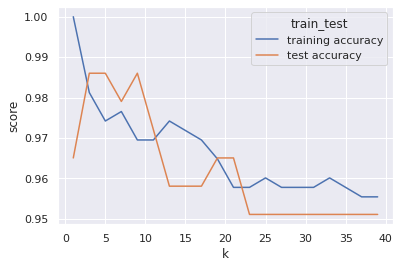

In [9]:
# training k-NN with different values of k to show overfitting and underfitting

from sklearn.neighbors import KNeighborsClassifier

neighbors = []
training_accuracy = []
test_accuracy = []
neighbors_settings = [n for n in range(1,41,2)]

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k).fit(features_train, target_train)
    neighbors.append(k)
    training_accuracy.append(knn.score(features_train, target_train))
    test_accuracy.append(knn.score(features_test, target_test))

results = pd.DataFrame([neighbors, training_accuracy, test_accuracy]).T
results.columns = ["k", "training accuracy", "test accuracy"]
results = pd.melt(results, 
                  id_vars='k', 
                  var_name="train_test", 
                  value_name="score")

sns.lineplot(x='k', 
             y='score', 
             hue='train_test', 
             data=results)

# **Decision Tree Classifier**

In [10]:
# training the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=99).fit(features_train, target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(features_test, target_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.916


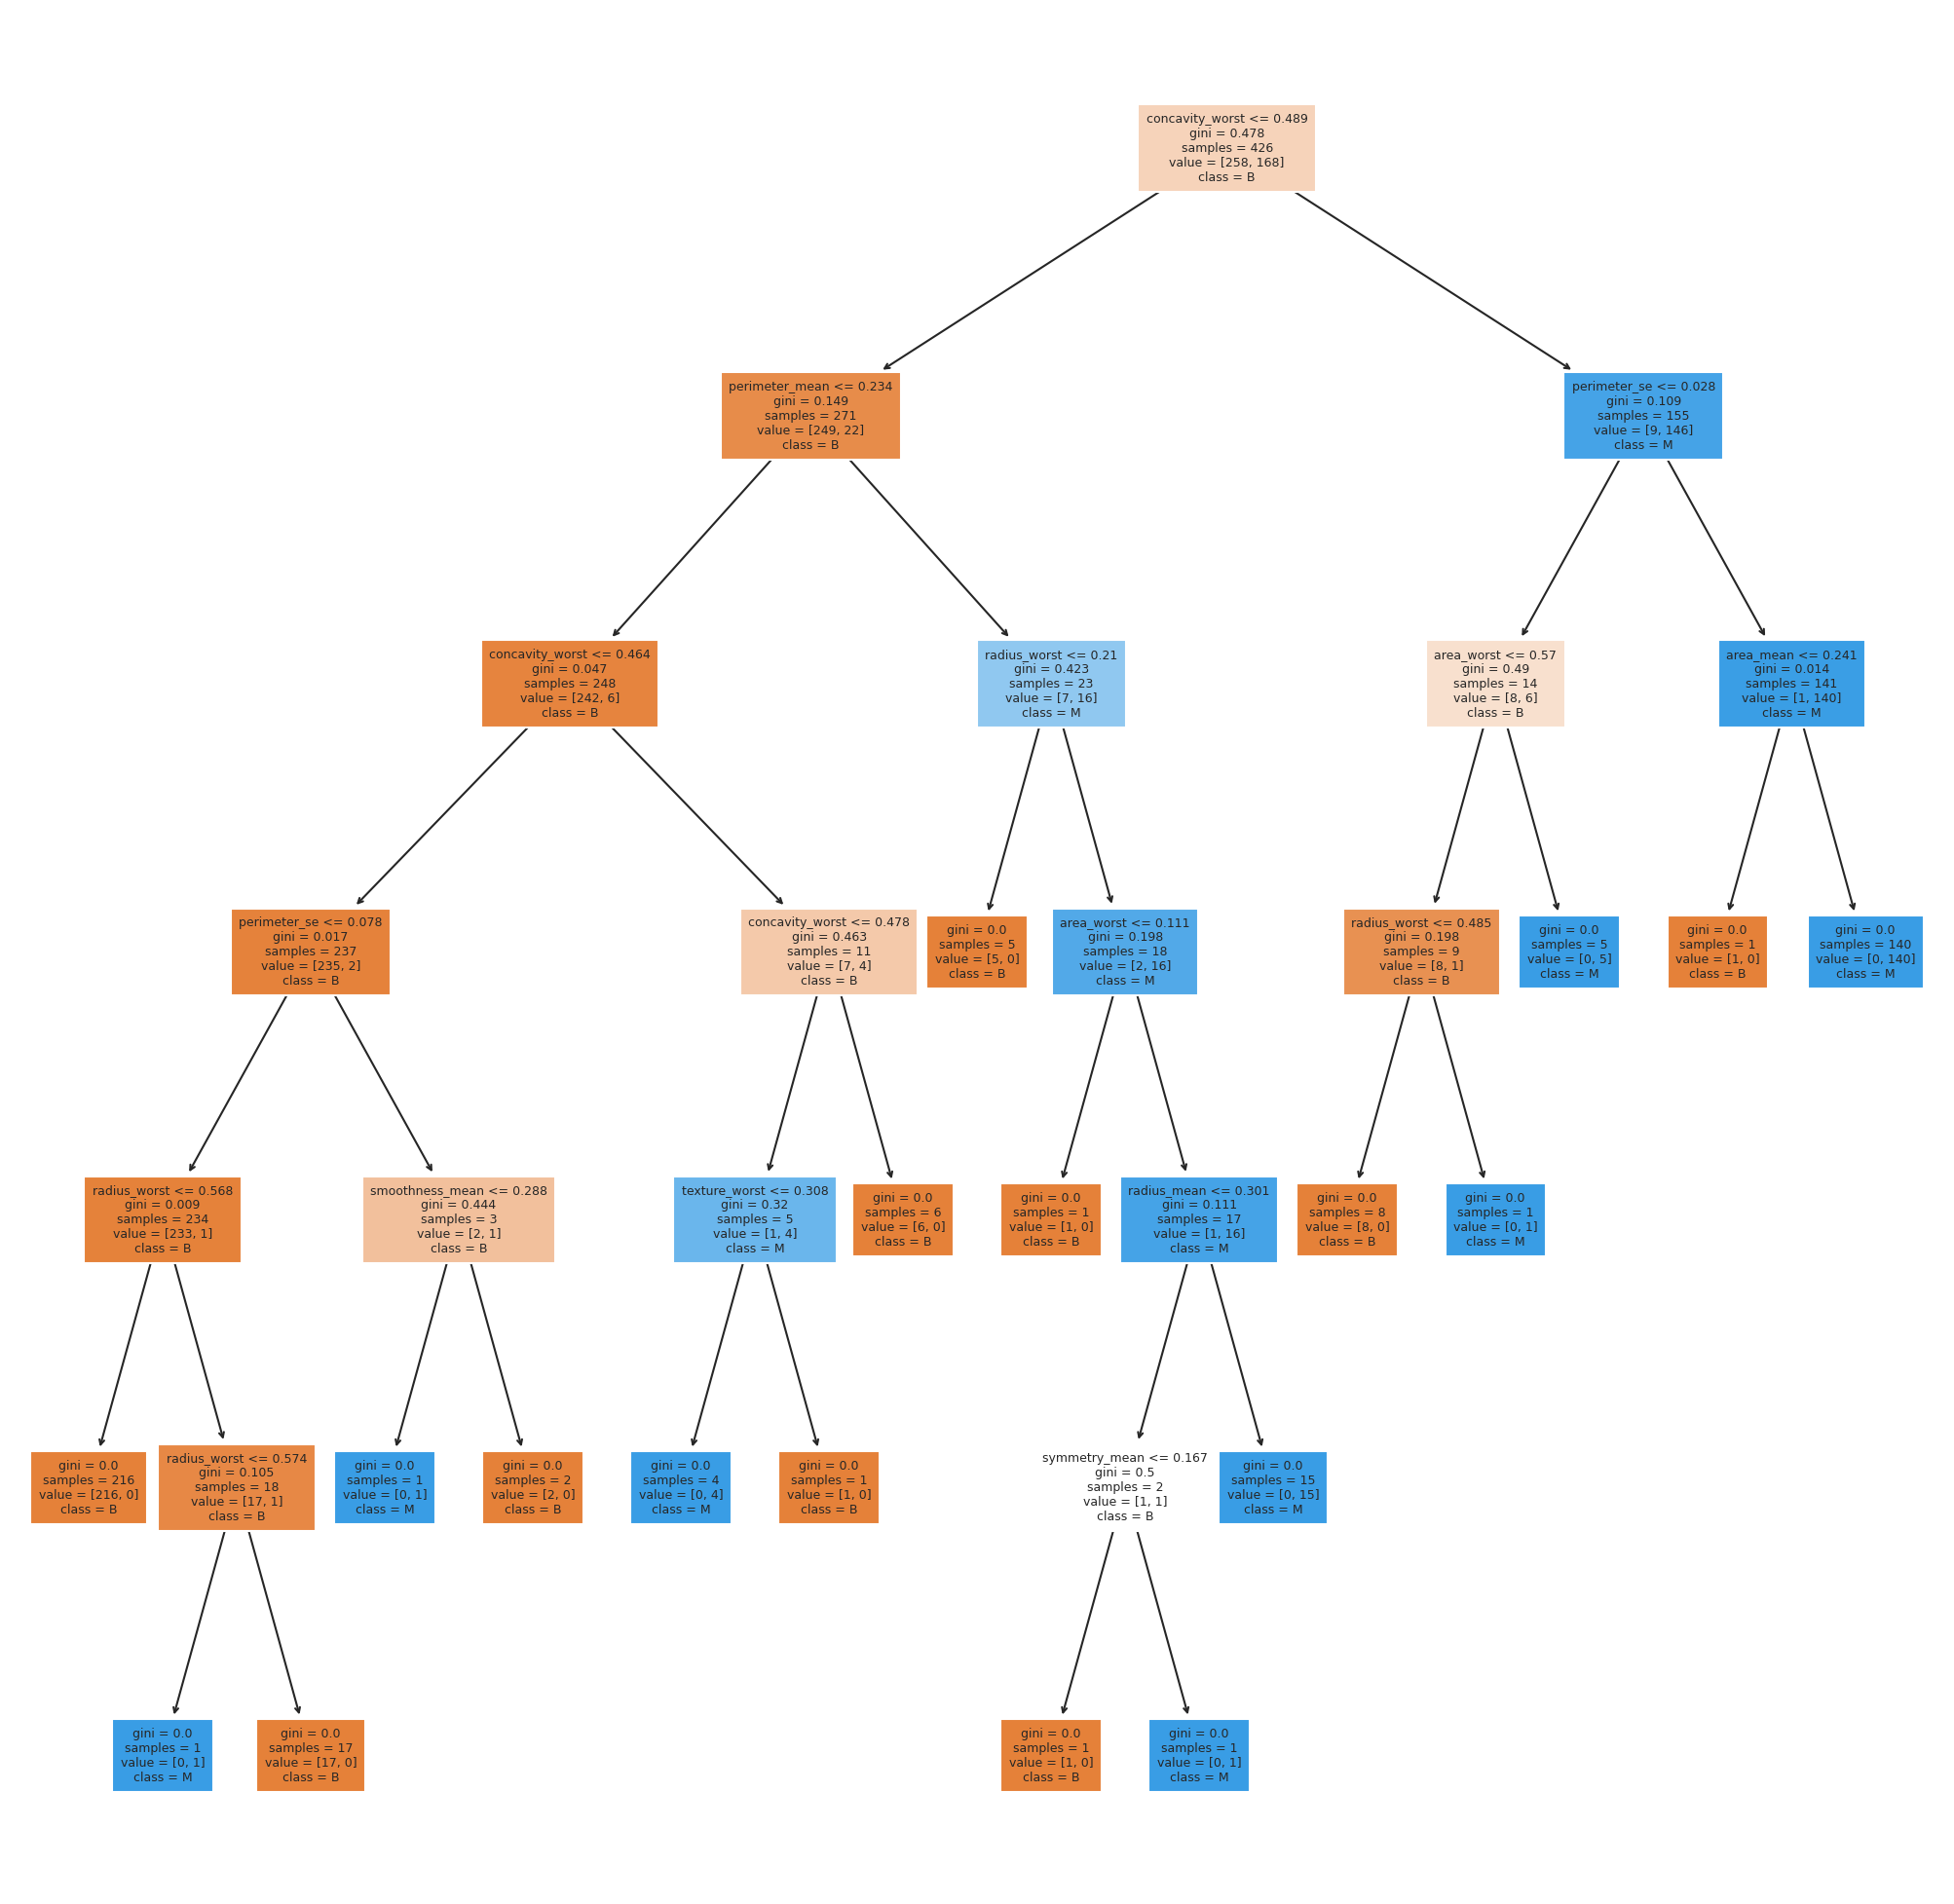

In [11]:
# how does our decision tree classifier come to a decision?

from sklearn.tree import plot_tree

fn = list(bc.columns)
cn = ["B", "M"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(17,17), dpi=150)
plot_tree(tree, feature_names=fn, class_names=cn, filled=True, fontsize=6);

## Pruning with max_depth

In [12]:
# pruning by limiting the maximum depth of the decision tree

tree = DecisionTreeClassifier(max_depth=3, random_state=99).fit(features_train, target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(features_test, target_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.951


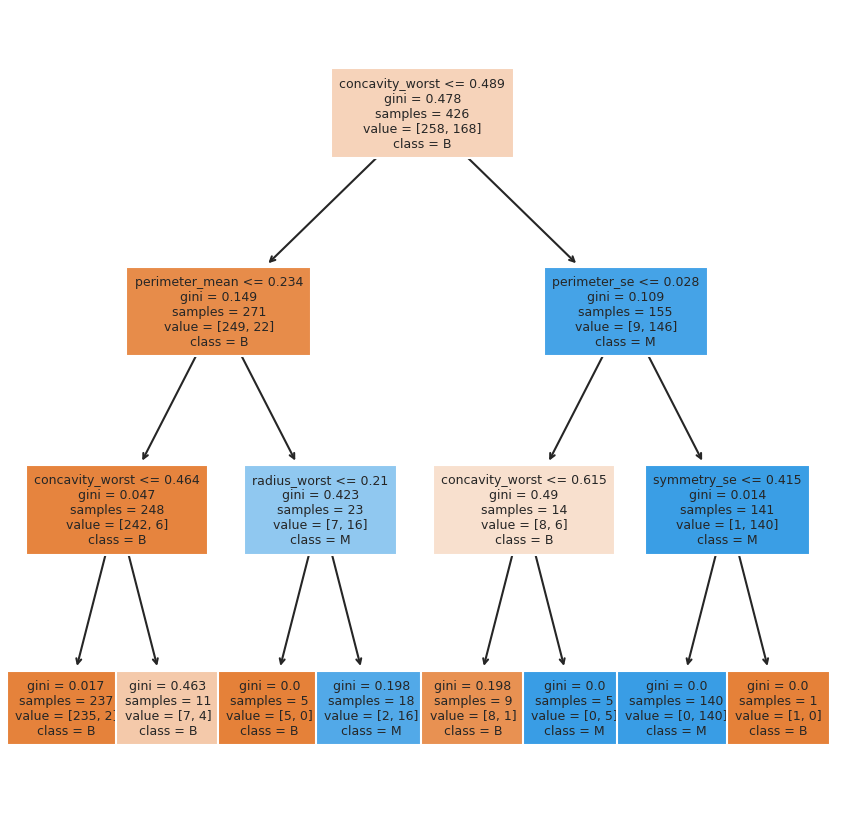

In [13]:
# plotting our pruned decision tree

fn = list(bc.columns)
cn = ["B", "M"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7), dpi=150)
plot_tree(tree, feature_names=fn, class_names=cn, filled=True, fontsize=6);

## Pruning with min_samples_split

In [14]:
# another way of pruning is by only allowing a split to be made

tree = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=99).fit(features_train, target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(features_test, target_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.944


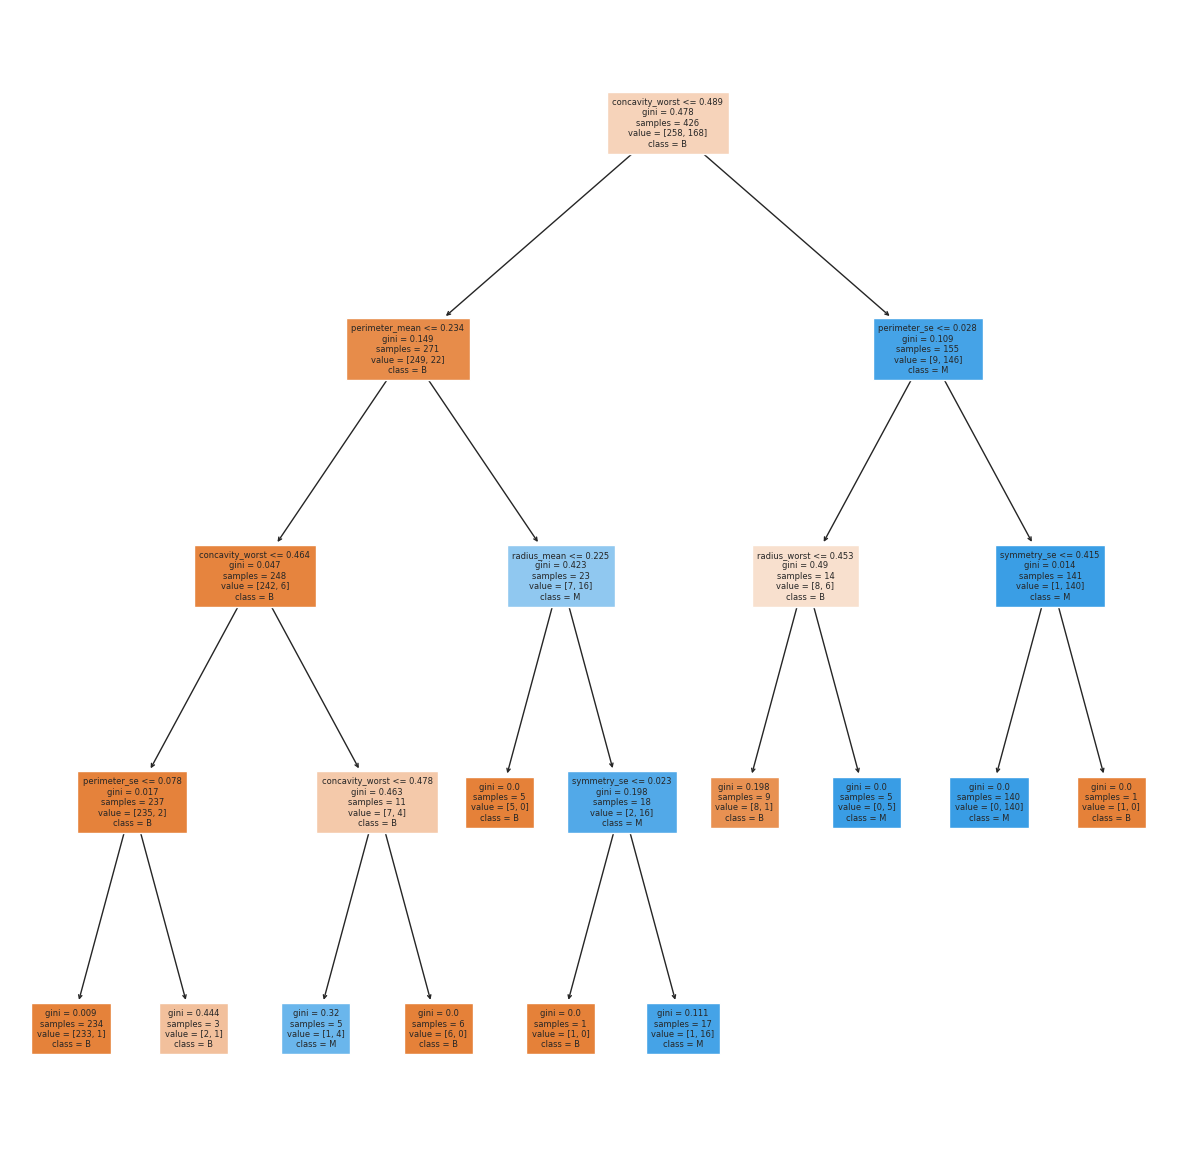

In [15]:
fn = list(bc.columns)
cn = ["B", "M"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15), dpi=100)
plot_tree(tree, feature_names=fn, class_names=cn, filled=True, fontsize=6);

## Feature Importances

In [ ]:
print(tree.feature_importances_)

[0.         0.0045414  0.         0.09768462 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04505274 0.         0.         0.         0.
 0.         0.01883268 0.         0.06821931 0.         0.
 0.         0.         0.         0.76566926 0.         0.        ]


In [ ]:
print(sum(tree.feature_importances_))

1.0


In [ ]:
# let's connect the feature importances to the corresponding features

fn = bc.columns[1:]
fi = tree.feature_importances_[1:]
fn_sorted = [x for _, x in sorted(zip(fi,fn), reverse=True)]
fi_sorted = sorted(fi, reverse=True)

for fn, fi in zip(fn_sorted, fi_sorted):
    print(f"{fn:25} {fi:.3f}")

# **Random Forest Classifier**

In [ ]:
# training the random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=99)
rf.fit(features_train, target_train)

print("Accuracy on training set: {:.3f}".format(rf.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(features_test, target_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


## Feature Importances

In [ ]:
# looking at feature importances of random forest classifier

fn_sorted = [fn for fi, fn in sorted(zip(rf.feature_importances_, list(bc.columns)[1:]), reverse=True)]
fi_sorted = sorted(list(rf.feature_importances_), reverse=True)

for fn, fi in zip(fn_sorted, fi_sorted):
    print(f"{fn:25} {fi:.3f}")

# **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=3, subsample=0.4, learning_rate=0.1, random_state=99)
gbc.fit(features_train, target_train)

print("Accuracy on training set: {:.3f}".format(gbc.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(gbc.score(features_test, target_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.993


# **Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=99)
rf.fit(features_train, target_train)

rfScores = cross_val_score(rf, features_train, target_train, cv=10)
print(rfScores)
print(f"Random Forest mean 5-fold Cross-Validation score: {np.mean(rfScores):.3f}")

[0.97674419 0.95348837 1.         0.97674419 0.97674419 0.88372093
 0.92857143 0.97619048 0.95238095 0.92857143]
Random Forest mean 5-fold Cross-Validation score: 0.955


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5).fit(features_train, target_train)
gbc.fit(features_train, target_train)

knnScores = cross_val_score(knn, features_train, target_train, cv=10)
print(knnScores)
print(f"k-NN mean 5-fold Cross-Validation score: {np.mean(knnScores):.3f}")

[1.         0.93023256 0.95348837 0.95348837 0.97674419 0.95348837
 0.95238095 0.97619048 0.97619048 0.97619048]
k-NN mean 5-fold Cross-Validation score: 0.965


## Leave-One-Out Cross-Validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

knn = KNeighborsClassifier(n_neighbors=5)
knnScores = cross_val_score(knn, features_train, target_train, cv=LeaveOneOut())

print(f"k-NN mean Leave-One-Out Cross-Validation score: {np.mean(knnScores):.3f}")

k-NN mean Leave-One-Out Cross-Validation score: 0.962


In [ ]:
print(f"Total models trained: {len(knnScores)}")
print("Score for each model:")
print(knnScores)

# **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": [k for k in range(1, 21, 2)],
    "weights": ["uniform", "distance"]
}

knn = GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=params) 

knn.fit(features_train, target_train)

print("Best average CV score on training set: {:.3f}".format(knn.best_score_))
print("Score on test set: {:.3f}".format(knn.score(features_test, target_test)))

Best average CV score on training set: 0.967
Score on test set: 0.986


In [ ]:
# Check out which model parameters performed best

knn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

# **Evaluation Metrics**

## Confusion Matrix

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=10, random_state=99)
logreg.fit(features_train, target_train)

print("Accuracy on training set: {:.4f}".format(logreg.score(features_train, target_train)))
print("Accuracy on test set: {:.4f}".format(logreg.score(features_test, target_test)))

Accuracy on training set: 0.9812
Accuracy on test set: 0.9860


In [17]:
from sklearn.metrics import confusion_matrix

pred_logreg = logreg.predict(features_test)

confusion_matrix(target_test, pred_logreg)

array([[99,  0],
       [ 2, 42]])

## Accuracy, Precision, Recall, F-Score

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy: {:.3f}".format(accuracy_score(target_test, pred_logreg)))
print("Precision: {:.3f}".format(precision_score(target_test, pred_logreg)))
print("Recall: {:.3f}".format(recall_score(target_test, pred_logreg)))
print("F-Score: {:.3f}".format(f1_score(target_test, pred_logreg)))

Accuracy: 0.986
Precision: 1.000
Recall: 0.955
F-Score: 0.977


### Manually Influencing Precision and Recall

In [19]:
logreg.predict(features_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
[format(x, '.3f') for x in logreg.predict_proba(features_test)[:,1]]

In [22]:
pred_logreg_thresh = logreg.predict_proba(features_test)[:,1] > 0.25

confusion_matrix(target_test, pred_logreg_thresh)

array([[94,  5],
       [ 1, 43]])

In [25]:
print("Accuracy: {:.3f}".format(accuracy_score(target_test, pred_logreg_thresh)))
print("Precision: {:.3f}".format(precision_score(target_test, pred_logreg_thresh)))
print("Recall: {:.3f}".format(recall_score(target_test, pred_logreg_thresh)))
print("F-Score: {:.3f}".format(f1_score(target_test, pred_logreg_thresh)))

Accuracy: 0.958
Precision: 0.896
Recall: 0.977
F-Score: 0.935


## Precision-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
precision, recall, thresholds = precision_recall_curve(target_test, logreg.decision_function(features_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold 0.5", fillstyle="none", c='k')
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=3, subsample=1, learning_rate=0.1, random_state=99)
gbc.fit(features_train, target_train)

print("Accuracy on training set: {:.3f}".format(gbc.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(gbc.score(features_test, target_test)))

In [ ]:
# plot precision-recall curves of LogReg vs GBC

plt.figure(figsize=(8,6))

precision, recall, thresholds = precision_recall_curve(target_test, logreg.decision_function(features_test))
close_zero = np.argmin(np.abs(thresholds))
plt.xlabel("Precision")
plt.ylabel("Recall")

precision_gbc, recall_gbc, thresholds_gbc = precision_recall_curve(
target_test, gbc.predict_proba(features_test)[:, 1])
plt.plot(precision, recall, label="logreg")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold 0.5 logreg", fillstyle="none", c='k')
plt.plot(precision_gbc, recall_gbc, label="gbc")
close_default_gbc = np.argmin(np.abs(thresholds_gbc - 0.5))
plt.plot(precision_gbc[close_default_gbc], recall_gbc[close_default_gbc], '^', c='k',
markersize=10, label="threshold 0.5 gbc", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

## Area Under Precision-Recall Curve

In [ ]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(target_test, gbc.predict_proba(features_test)[:, 1])
ap_logreg = average_precision_score(target_test, logreg.decision_function(features_test))
print("PRC AUC of Gradient Boosting Classifier: {:.3f}".format(ap_rf))
print("PRC AUC of Logistic Regression: {:.3f}".format(ap_logreg))